# Table of Contents
* [Goal](#Goal)
* [Wrangle](#Wrangle)
* [Explore Data Analysis](#Explore)
  * [Overall Top 20](#Overall-Top-20-Words)
  * [Each Langauge's Top 10 Words](#Top-10-Words-from-Javascript-and-Python)
  * [Primary Visual](#Primary-Visual)
  * [Hypothesis Testing](#Hypothesis-Testing)
    * [Hypothesis Testing Results](#Analysis-of-Hypothesis-Test-Results)
* [Modeling](#Modeling)
    * [Train](#Train)
    * [Validate](#Validate)
    * [Test](#Test)
* [Conclusion](#Conclusion)

In [1]:
# establishing environment
import re

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from scipy import stats
from prepare import prep_gitMDs
from wordcloud import WordCloud
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

import warnings
warnings.filterwarnings("ignore")

print('Initalized')

Initalized


# Goal
The goal of this project is to use Natural Language Processing (NLP) to predict the primary coding language of a git repo using the repo's README.  

We will also deliver the following:

  * A Jupyter notebook containing detailing to every step of this project
  * A 5-minute presentation about the project, including slides (link to slides below)
      * https://docs.google.com/presentation/d/1wNYOyxX93J5lUzoYLq9aLPqp2yUaqZrJBgksooCsT5s/edit?usp=sharing

# Wrangle
We will use the modules ***[prepare.py](https://github.com/NLP-MVPs/nlp-project/blob/main/prepare.py)***, which contains our ***[acquire.py](https://github.com/NLP-MVPs/nlp-project/blob/main/acquire.py)*** module, to gather the data, clean the data, and put it into a dataframe. From there we will begin to wrangle the data for exploration focusining mainly on creating word strings and additional dataframe from our data.

[Table of Contents](#Table-of-Contents)

In [2]:
help(prep_gitMDs)

Help on function prep_gitMDs in module prepare:

prep_gitMDs()
    Uses the helper functions contained within the prepare.py module on the gitMDs repo url list from the acquire.py module to create a unified data frame for exploration
    * Applies a basic_body_clean, tokenizizatize, removestop_words, AND lemmatizes fuctions to the readme body text
      and returns the output as df['clean'].
    * Applies the basic_code_clean, tokenizizatize, and removestop_words fuctions to the top_code 
      and returns it as df['top_code_cleaned]
    * Splits df['top_code_cleaned] into two columns df['top_code_cleaned'] and df['top_percentage_cleaned']
    * Returns the gitMDs as a data frame



### Acquire the data using function from wrangle.py file

In [3]:
# Use the prep_gitMDs fuction to run the acquire and prepare scripts
df = prep_gitMDs()

df.head()

,body,top_code,clean,top_code_clean,percentage
0,\n\n\n\n\nfreeCodeCamp.org's open-source codeb...,\n\nJavaScript\n91.3%\n,freecodecamporg ' opensource codebase curricul...,javascript,91.3
1,\n\n\n\n\n\n\n\n\n\n\nSupporting Vue.js\nVue.j...,\n\nJavaScript\n97.7%\n,supporting vuejs vuejs mitlicensed open source...,javascript,97.7
2,React · \nReact is a JavaScript library for...,\n\nJavaScript\n95.0%\n,react react javascript library building user i...,javascript,95.0
3,"\n\n\n\n\nBootstrap\n\n Sleek, intuitive, and...",\n\nJavaScript\n46.7%\n,bootstrap sleek intuitive powerful frontend fr...,javascript,46.7
4,Airbnb JavaScript Style Guide() {\nA mostly re...,\n\nJavaScript\n100.0%\n,airbnb javascript style guide mostly reasonabl...,javascript,100.0


### Pruning columns and splitting into Train, Validate and Test samples

In [4]:
# dropping columns we won't be using
df.drop(columns = ['body', 'top_code', 'percentage'], inplace = True)

# renaming columns
df.columns = ['readme', 'language']

# splitting data in train, validate and test
train_validate, test = train_test_split(df[['language', 'readme']], 
                                        stratify=df.language, 
                                        test_size=.2, 
                                        random_state=333)

train, validate = train_test_split(train_validate, 
                                   stratify=train_validate.language, 
                                   test_size=.25,
                                   random_state=333)

In [5]:
# printing rows/columns for each dataset to confirm they split correctly
print(train.shape, validate.shape, test.shape)

(137, 2) (46, 2) (46, 2)


### Combining the readme text of each language into separate series' for exploration

In [6]:
# create series objects for each top_code_clean that is a string of words joined on spaces 
# to make it 1 continious string for python
python_words = ' '.join(train[train.language=='python'].readme)

# for javascript
javascript_words = ' '.join(train[train.language == 'javascript'].readme)

# both python and java script
all_words = ' '.join(train.readme)

In [7]:
# Then for each series remove any stand-alone characters to reduce noise
python_words = re.sub(r'\s.\s', '', python_words)
javascript_words = re.sub(r'\s.\s', '', javascript_words)
all_words = re.sub(r'\s.\s', '', all_words)

# Explore

Now that the data has been processed into more usable forms we can begin to explore the data for features we can use in building our models. We will create a wordcloud and frequency chat from the top 20 words used across both programing lanauges, and then we will create a frequency chart and word cloud charts from our top10 words data frame.

[Table of Contents](#Table-of-Contents)

### Finding the most common words within all READMEs as well as each language's respective READMEs

In [8]:
# For each top_code_clean find out how many times each word happens and put that into a topic_freq obj.
all_freq = pd.Series(all_words.split()).value_counts()
python_freq = pd.Series(python_words.split()).value_counts()
javascript_freq = pd.Series(javascript_words.split()).value_counts()

python_freq.head()

yes        680
unknown    523
no         462
github     339
use        253
dtype: int64

In [9]:
# Combine all the series together into a single data frame to see the word count across all topics
word_counts = (pd.concat([all_freq, python_freq, javascript_freq], axis=1, sort=True)
               .set_axis(['all', 'python', 'javascript', ], axis=1, inplace=False)
               .fillna(0)
               .apply(lambda s: s.astype(int))
              )

word_counts.head()

,all,python,javascript
&#9;,566,144,422
&#9;&#9;p,1,1,0
&#9;110,1,0,1
&#9;111,1,0,1
&#9;112,1,0,1


### Create a list of words that combines the top 10 words used by javascript and python into a single list, and then create a dataframe that only looks at all those words.

In [10]:
# Top 10 words used by javascript
top_10_js_words = word_counts['javascript'].sort_values(ascending=False).head(10)

# top 10 words by python
top_10_py_words = word_counts['python'].sort_values(ascending=False).head(10)

# combines the lists together
top_10_each = (list(top_10_py_words.index) + list(top_10_js_words.index))

# Create the new data frame where the index values match the top_10_each value
top10 = word_counts[word_counts.index.isin(top_10_each)]

top10

,all,python,javascript
&#9;,566,144,422
apikey,248,248,0
app,373,22,351
application,284,27,257
component,300,14,286
data,405,232,173
file,438,131,307
github,418,339,79
image,378,251,127
install,404,251,153


## Overall Top 20 Words

[Table of Contents](#Table-of-Contents)

In [11]:
# Create a top 20 all_words df
top_20_all_words = word_counts['all'].sort_values(ascending=False).head(20)

top_20_all_words

native        882
react         879
yes           684
use           588
&#9;          566
javascript    548
no            544
unknown       523
using         438
file          438
github        418
code          413
data          405
install       404
image         378
app           373
example       365
not           334
support       334
api           327
Name: all, dtype: int32

### Word Cloud of top 20 words in all READMEs

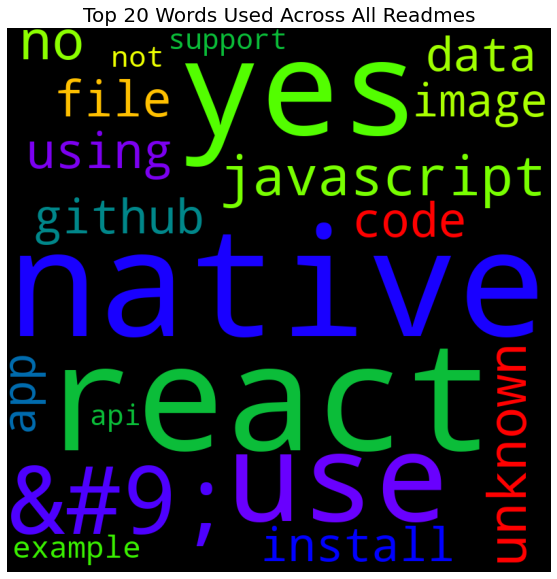

In [12]:
# Turn the dataframes into dictionaries
allz = {k: v for k, v in top_20_all_words.to_dict().items()}

# Use the dictionary objects and .generate_from_frequencies method of WordCloud 
# to generate a wordcloud map for each language
all_top_20_cloud = WordCloud(background_color='black', 
                      height=800, width=800, colormap='prism').generate_from_frequencies(allz)

plt.figure(figsize=(10,10))
plt.title("Top 20 Words Used Across All Readmes", fontsize=20)
plt.imshow(all_top_20_cloud)
plt.axis('off')
plt.show()

### Visualization of the top 20 words in all READMEs

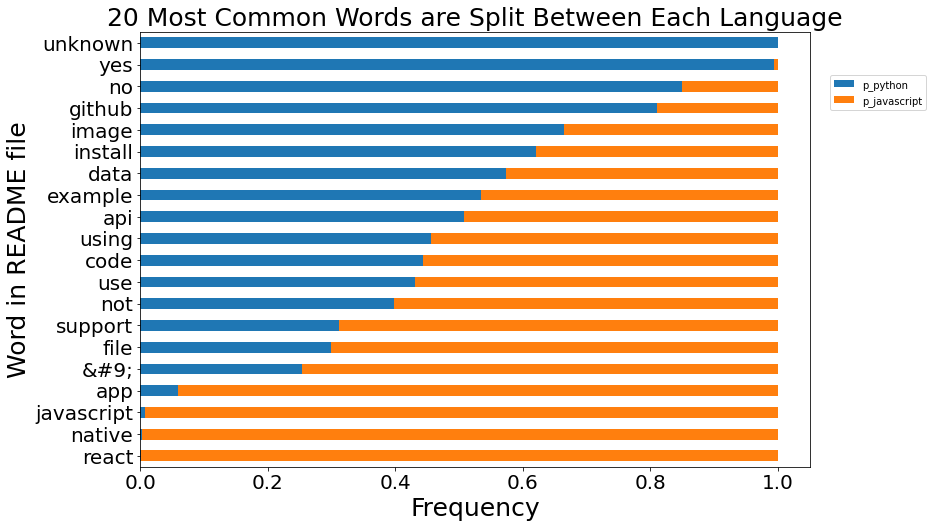

In [13]:
# visualize the percentage each coding language makes up for the top 20 words
(word_counts.assign(p_python = word_counts.python/word_counts['all'], 
                   p_javascript = word_counts.javascript/word_counts['all'])
 .sort_values(by='all')[['p_python', 'p_javascript']]
 .tail(20)
 .sort_values(by='p_python')
 .plot.barh(stacked=True, figsize=(12,8))
)
plt.title("20 Most Common Words are Split Between Each Language", fontsize=25)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xlabel('Frequency', fontsize=25)
plt.ylabel('Word in README file', fontsize=25)
plt.legend(bbox_to_anchor=(1.03, .9),borderaxespad=0)
plt.show()

## Top 10 Words from Javascript and Python

[Table of Contents](#Table-of-Contents)

### Word Cloud of top 10 words in Javascript and Python READMEs

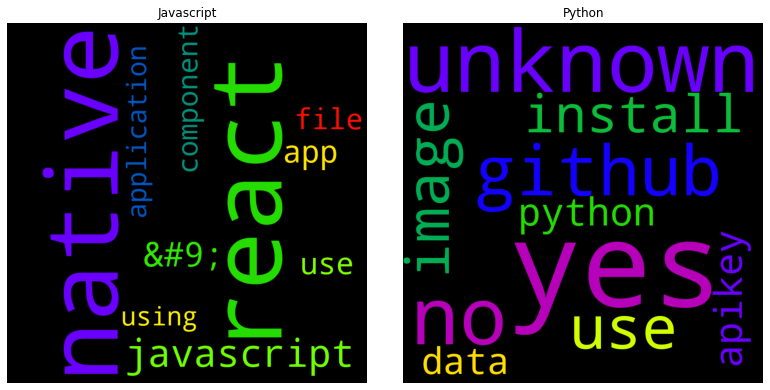

In [14]:
# Createa a top 10 words for each javascript and python
top_10_js_words = word_counts['javascript'].sort_values(ascending=False).head(10)
top_10_py_words = word_counts['python'].sort_values(ascending=False).head(10)

# Turn the dataframes into dictionaries
js = {k: v for k, v in top_10_js_words.to_dict().items()}
py = {k: v for k, v in top_10_py_words.to_dict().items()}


# Use the dictionary objects and .generate_from_frequencies method of WordCloud to generate a wordcloud map for each language
js10_cloud = WordCloud(background_color='black', 
                      height=800, width=800, colormap='prism').generate_from_frequencies(js)

py10_cloud = WordCloud(background_color='black', 
                      height=800, width=800, colormap='prism').generate_from_frequencies(py)

# Change the figure size
plt.figure(figsize=(10,10))
axs = [plt.axes([.25, 1, .5, .5]), plt.axes([.8, 1, .5, .5])]

# imshow => display data as an image
axs[0].imshow(js10_cloud)
axs[1].imshow(py10_cloud)

axs[0].set_title('Javascript')
axs[1].set_title('Python')

# Turn off the axis
for ax in axs: ax.axis('off')

# Primary Visual
### Word Cloud of top 10 words in Javascript and Python READMEs

The image below is what led us to create additional features: 
* Create a feature, has_react, which is true where a readme contains the word react
* Create a feature, has_native, which is true where a readme contains the word native
* Create a feature, has_apikey, which is true where a readme contains the word apikey
* Create a feature, has_unknown, which is true where a readme contains the word unknown
* Create freatures for top 5 python words and top 5 JavaScript words which is true if a readme contains any of those words

[Table of Contents](#Table-of-Contents)

<Figure size 1440x1008 with 0 Axes>

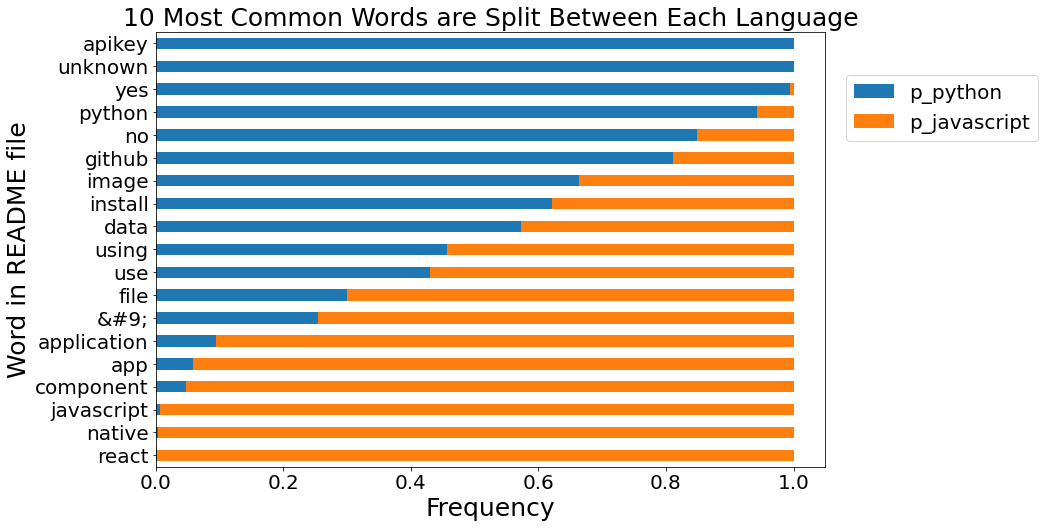

In [15]:
# visualize the percentage each coding language makes up for the top 10words of each programing language
plt.figure(figsize=(20,14))
(top10.assign(p_python = top10.python/top10['all'], 
                   p_javascript = top10.javascript/top10['all'])
 .sort_values(by='all')[['p_python', 'p_javascript']]
 .tail(20)
 .sort_values(by='p_python')
 .plot.barh(stacked=True, figsize=(12,8))
)

plt.title("10 Most Common Words are Split Between Each Language", fontsize=25)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xlabel('Frequency', fontsize=25)
plt.ylabel('Word in README file', fontsize=25)
plt.legend(bbox_to_anchor=(1.03, .9),borderaxespad=0, fontsize=20)
plt.show()

# Hypothesis Testing
[Table of Contents](#Table-of-Contents)

We'll now perform several hypothesis tests to confirm if the presence of certain words within a README are correlated with its respective language.

## Creating column reflecting if README contains word from top 5 JavaScript words 

In [16]:
# creating list of top 5 most common words in JavaScript readmes
top_5_js_words = word_counts['javascript'].sort_values(ascending=False).head(5).index.tolist()

top_5_js_words

['native', 'react', 'javascript', '&#9;', 'app']

In [17]:
# adding column that holds true if a readme contains a "top 5 most common JS word"
# and false otherwise
contains = [train['readme'].str.contains(w) for w in top_5_js_words]

t5_js_index = train[np.any(contains, axis = 0)].index.tolist()

train['has_top_5_js_word'] = train.index.isin(t5_js_index)

train.head()

,language,readme,has_top_5_js_word
74,javascript,leaflet leading opensource javascript library ...,True
193,python,stylegan official tensorflow implementation pi...,True
210,python,beet beet medium library management system obs...,False
152,python,ai learning github page httpsailearningapachec...,False
73,javascript,clipboardjs modern copy clipboard no flash 3kb...,True


## Creating column reflecting if README contains word from top 5 Python words 

In [18]:
# creating list of top 5 most common words in Python readmes
top_5_py_words = word_counts['python'].sort_values(ascending=False).head(5).index.tolist()

top_5_py_words

['yes', 'unknown', 'no', 'github', 'use']

In [19]:
# adding column that holds true if a readme contains a "top 5 most common python word"
# and false otherwise
contains = [train['readme'].str.contains(w) for w in top_5_py_words]

t5_py_index = train[np.any(contains, axis = 0)].index.tolist()

train['has_top_5_py_word'] = train.index.isin(t5_js_index)

train.head()

,language,readme,has_top_5_js_word,has_top_5_py_word
74,javascript,leaflet leading opensource javascript library ...,True,True
193,python,stylegan official tensorflow implementation pi...,True,True
210,python,beet beet medium library management system obs...,False,False
152,python,ai learning github page httpsailearningapachec...,False,False
73,javascript,clipboardjs modern copy clipboard no flash 3kb...,True,True


### has_react, has_unknown, has_native and has_apikey categorical features
In addition to looking at the top 5 words from each coding language, we will create has_react, has_unknown, has_native and has_apikey features. 

These words were choosen because the word "react" and "native" only appeared in JavaScript labled readmes while the text "apikey" and "unknown" was only found in python labled readmes and all were in the top 10 of most seen words for each language respectively.

In [20]:
# adding has_react column that hold true if a readme contains "react" and false otherwise
train['has_react'] = train.readme.str.contains('react')

# adding has_apikey column that hold true if a readme contains "apikey" and false otherwise
train['has_apikey'] = train.readme.str.contains('apikey')

# adding column that hold true if a readme contains "apikey" and false otherwise
train['has_native'] = train.readme.str.contains('native')

# adding column that hold true if a readme contains "apikey" and false otherwise
train['has_unknown'] = train.readme.str.contains('unknown')


train.head()

,language,readme,has_top_5_js_word,has_top_5_py_word,has_react,has_apikey,has_native,has_unknown
74,javascript,leaflet leading opensource javascript library ...,True,True,False,False,False,False
193,python,stylegan official tensorflow implementation pi...,True,True,False,False,True,False
210,python,beet beet medium library management system obs...,False,False,False,False,False,False
152,python,ai learning github page httpsailearningapachec...,False,False,False,False,False,False
73,javascript,clipboardjs modern copy clipboard no flash 3kb...,True,True,False,False,False,False


# Hypothesis Testing
[Table of Contents](#Table-of-Contents)

Now that we've created 6 features based on our visual observations we should test and see if these observations are statisitically signficant before adding them to our models. 

As we are comparing two catagorical variable we will need to conduct a ***Chi-Squared*** test for each of our created features against _language_. From the testing below, we see that has_react does have a statisitically significant realtionship with language. 

## Top 5 JS Words
H0: The presence of a "top 5 most common JavaScript" word and a repo's programming language are indepedent<br>
Ha: The presence of a "top 5 most common JavaScript" word and a repo's programming language are depedent

In [21]:
# Conduct a Chi Squared test against has_top_5_js_word
observed = pd.crosstab(train.language, train.has_top_5_js_word)

chi2, p, degf, expected = stats.chi2_contingency(observed)
print('alpha = .05\n')
print(f'has_top_5_js_word values\nchi2: {chi2}, p: {p}\n')

alpha = .05

has_top_5_js_word values
chi2: 3.427463745335704, p: 0.06412050161183944



## Top 5 Py Words

H0: The presence of a "top 5 most common Python" word and a repo's programming language are indepedent<br>
Ha: The presence of a "top 5 most common Python" word and a repo's programming language are depedent

In [22]:
# Conduct a Chi Squared test against has_top_5_js_word
observed = pd.crosstab(train.language, train.has_top_5_py_word)

chi2, p, degf, expected = stats.chi2_contingency(observed)
print('alpha = .05\n')
print(f'has_top_5_py_word values \nchi2: {chi2}, p: {p}\n')

alpha = .05

has_top_5_py_word values 
chi2: 3.427463745335704, p: 0.06412050161183944



### Has_React

H0: The presence of the text, "react", in a readme, and a repo's programming language are indepedent<br>
Ha: The presence of the text, "react", in a readme, and a repo's programming language are depedent

In [23]:
# Conduct a Chi Squared test against has_react
observed = pd.crosstab(train.language, train.has_react)

chi2, p, degf, expected = stats.chi2_contingency(observed)
print('alpha = .05\n')
print(f'has_react values \nchi2: {chi2}, p: {p} \n')

alpha = .05

has_react values 
chi2: 13.718507650335773, p: 0.00021235153324672268 



### Has_apikey

H0: The presence of the text, "apikey", in a readme, and a repo's programming language are indepedent<br>
Ha: The presence of the text, "apikey", in a readme, and a repo's programming language are depedent

In [24]:
# Conduct a Chi Squared test against has_apikey
observed = pd.crosstab(train.language, train.has_apikey)

chi2, p, degf, expected = stats.chi2_contingency(observed)
print('alpha = .05\n')
print(f'has_apikey values\nchi2: {chi2}, p: {p}')

alpha = .05

has_apikey values
chi2: 0.008028367776502116, p: 0.928604162999248


### Has_native

H0: The presence of the text, "native", in a readme, and a repo's programming language are indepedent<br>
Ha: The presence of the text, "native", in a readme, and a repo's programming language are depedent

In [25]:
# Conduct a Chi Squared test against has_apikey
observed = pd.crosstab(train.language, train.has_native)

chi2, p, degf, expected = stats.chi2_contingency(observed)
print('alpha = .05\n')
print(f'has_native values\nchi2: {chi2}, p: {p}')

alpha = .05

has_native values
chi2: 1.7130451058463299, p: 0.1905907597793555


### Has_unknown

H0: The presence of the text, "unknown", in a readme, and a repo's programming language are indepedent<br>
Ha: The presence of the text, "unknown", in a readme, and a repo's programming language are depedent

In [26]:
# Conduct a Chi Squared test against has_unknown
observed = pd.crosstab(train.language, train.has_unknown)

chi2, p, degf, expected = stats.chi2_contingency(observed)
print('alpha = .05\n')
print(f'has_unknown values\nchi2: {chi2}, p: {p}')

alpha = .05

has_unknown values
chi2: 2.6511367561532038, p: 0.1034758769952285


## Analysis of Hypothesis Test Results

- Hypothesis tests [has_apikey](#Has_apikey), [has_native](#Has_native), [has_unknown](#Has_unknonw), [has_top_5_py_words](#Top-5-Py-Words), [has_top_5_js_words](#Top-5-JS-Words) produced p values that are above their alpha (.05), so we do no reject their respective null hypothesis'. 
<br>
- Hypothesis test [has_react](#Has_React), which tested if the presence of the text, "react", in a readme, was dependent on the language of the readme, produced a p-value far below its alpha (.05).
    - We will use a feature that indicates whether the word "react" is within a readme as a modeling feature since it is stastically significant

# Modeling
[Table of Contents](#Table-of-Contents)

We'll now create various models that will make predictions about the most prominent programming language found in a repository based on the text within it's README file.

We will use accuracy as our evaluation metric. The reason we're using accuracy is because we're primarily focused on how well our model can predict a repo's language and we're weighing our predictions between JavaScript and Python equally.

## Train

[Table of Contents](#Table-of-Contents)

### Baseline Model - Train
- Always predicts Javascript since that is the most common language

In [27]:
# checking which language is most prominent
train.language.value_counts()

javascript    72
python        65
Name: language, dtype: int64

In [28]:
# setting baseline prediction to always be javascript
train['baseline_prediction'] = 'javascript'

# printing performance metrics
print(classification_report(train.language, train.baseline_prediction))

              precision    recall  f1-score   support

  javascript       0.53      1.00      0.69        72
      python       0.00      0.00      0.00        65

    accuracy                           0.53       137
   macro avg       0.26      0.50      0.34       137
weighted avg       0.28      0.53      0.36       137



### "Has_react" Model - Train
- Logistic regression algorithim
- Predicts language based on whether or not the text "react" is within the readme


In [29]:
# converting True/False to 1 and 0 in has_react column
train['has_react'] = np.where((train.has_react == True), 1, 0)

# setting target variable
y_train = train['language']

# setting feature for model
X_train_hasreact = train[['has_react']]

In [30]:
# creating logistic regression object
lr_hasreact = LogisticRegression(random_state=123)

# fitting model to data
lr_hasreact.fit(X_train_hasreact, y_train)

# creating column with model predictions
train['hasreact_prediction'] = lr_hasreact.predict(X_train_hasreact)

# printing performance metrics
print(classification_report(train.language, train.hasreact_prediction))

              precision    recall  f1-score   support

  javascript       0.88      0.31      0.45        72
      python       0.55      0.95      0.70        65

    accuracy                           0.61       137
   macro avg       0.72      0.63      0.58       137
weighted avg       0.73      0.61      0.57       137



### Bag of Words Model - Train
- Logistic regression model
- Uses Bag-of-Words as sole feature
    - predicts language by counting how many times a word appears in each README

In [31]:
# creating vectorizer
vectorizer = CountVectorizer(stop_words='english', 
                             min_df=20, 
                             ngram_range=(1,2), 
                             binary=True)

# Learn vocabulary in sentences. 
vectorizer.fit(train.readme)

# Get dictionary. 
vectorizer.get_feature_names()

# Transform each sentences in vector space.
bow = vectorizer.transform(train.readme)

X_bow = bow

# creating logistic regression object
lr_bag = LogisticRegression(random_state=123)

# fitting model to data
lr_bag = lr_bag.fit(X_bow, y_train)

train['bag_prediction'] = lr_bag.predict(X_bow)

print(classification_report(train.language, train.bag_prediction))

              precision    recall  f1-score   support

  javascript       1.00      1.00      1.00        72
      python       1.00      1.00      1.00        65

    accuracy                           1.00       137
   macro avg       1.00      1.00      1.00       137
weighted avg       1.00      1.00      1.00       137



### TF-IDF Model - Train
- Logistic regression model
- Uses TF-IDF as sole feature
    - Weighs term frequency (TF), how often a term appears in a README and inverse document frequency (IDF), how important a term is, to predict programming language

In [32]:
# creating tfidf vectorizer
tfidf = TfidfVectorizer(stop_words='english', min_df = 20,
                             ngram_range=(1,2), 
                             binary=True)

# fitting and transforming readme data 
tfidf_sparse_matrix = tfidf.fit_transform(train.readme)

# get vocabulary
tfidf.vocabulary_

# Transform to document-term matrix
vector_spaces = tfidf.transform(train.readme)

X_tfidf = tfidf_sparse_matrix

# creating logistic regression object
lr_tfidf = LogisticRegression(random_state=123)

# fitting data model to data
lr_tfidf = lr_tfidf.fit(X_tfidf, y_train)

train['tfidf_prediction'] = lr_tfidf.predict(X_tfidf)

print(classification_report(train.language, train.tfidf_prediction))

              precision    recall  f1-score   support

  javascript       0.99      0.97      0.98        72
      python       0.97      0.98      0.98        65

    accuracy                           0.98       137
   macro avg       0.98      0.98      0.98       137
weighted avg       0.98      0.98      0.98       137



## TRAIN MODELS EVALUATION

We'll use accuracy as our evaluation metric since we're focused on how well our models can predict a repo's language and we're weighing our predictions between JavaScript and Python equally.

- Baseline model performed with an accuracy score .53
- has_react model performed with an accuracy score of .61
- Bag of words performed with an accuracy score of 1
- TF-IDF model performed with an accuracy score of .98

Bag of Words and TF-IDF model had the highest accuracy scores, 1.0 and .98, respectively, so we're going to use them with our validate samples.

## Validate

[Table of Contents](#Table-of-Contents)

### Bag of Words Model - Validate

In [33]:
# Transform each sentence in vector space.
v_bow = vectorizer.transform(validate.readme)

# adding prediction column
validate['bag_prediction'] = lr_bag.predict(v_bow)

# printing evaluation metrics
print(classification_report(validate.language, validate.bag_prediction))

              precision    recall  f1-score   support

  javascript       0.83      0.79      0.81        24
      python       0.78      0.82      0.80        22

    accuracy                           0.80        46
   macro avg       0.80      0.80      0.80        46
weighted avg       0.81      0.80      0.80        46



### TF-IDF Model - Validate

In [34]:
# transforming readme data
tfidf_sparse_matrix = tfidf.transform(validate.readme)

# Transform to document-term matrix
vector_spaces = tfidf.transform(validate.readme)

X_tfidf = tfidf_sparse_matrix

# adding prediction column
validate['tfidf_prediction'] = lr_tfidf.predict(X_tfidf)

# printing evaluation metrics
print(classification_report(validate.language, validate.tfidf_prediction))

              precision    recall  f1-score   support

  javascript       0.81      0.92      0.86        24
      python       0.89      0.77      0.83        22

    accuracy                           0.85        46
   macro avg       0.85      0.84      0.85        46
weighted avg       0.85      0.85      0.85        46



## VALIDATE MODELS EVALUATION

As before, we're ranking our models' performance based on their accuracy scores.

- Bag of words performed with an accuracy score of .80
- TF-IDF model performed with an accuracy score of .85

Since TF-IDF scored higher, we're going to use it on our test data set.

## Test

[Table of Contents](#Table-of-Contents)

### TF-IDF Model - Test

In [35]:
# transforming data
tfidf_sparse_matrix = tfidf.transform(test.readme)

# Transform to document-term matrix
vector_spaces = tfidf.transform(test.readme)

X_tfidf = tfidf_sparse_matrix

# adding prediction column
test['tfidf_prediction'] = lr_tfidf.predict(X_tfidf)

# printing evaluation metrics
print(classification_report(test.language, test.tfidf_prediction))

              precision    recall  f1-score   support

  javascript       0.80      1.00      0.89        24
      python       1.00      0.73      0.84        22

    accuracy                           0.87        46
   macro avg       0.90      0.86      0.87        46
weighted avg       0.90      0.87      0.87        46



## TEST MODEL EVALUATION

- TF-IDF model produced an accuracy score of .87 while predicted programming languages in our test sample.

In light of it's high accuracy scores throughout each modeling phase, TF-IDF has proven to be a reliable model on both in-sample (train) and out-of-sample (validate, test) data.

# Conclusion

[Table of Contents](#Table-of-Contents)

### Results & Conclusion
After creating and testing 4 models, we found that the TFIDF model returned the highest accuracy results on our test data set with an 87% accuracy rating. Although Bag-of-words was not our best model, it still had an accuracy rating of 80% on unseen data (test sample).

### Recommendations 
We believe that Readmes are an invaluable tool for understanding how code works and why people should use them. If our NLP modeling is not able to fairly and accurately predict the programming language that is being used by the author, it may be unlikely that others will be able to. As such, we recommend that people invest more time in creating more robust readmes. Doing so could increase understanding of code by coders and non-coders alike. 

### Next Steps
* **Gather More Data** - Our model may only work well with JavaScript and Python programing languages as our samples only contained these two languages. We would be interested to see if the methods we used to create our models could be used to create ones that are capable of predicting other programming languages with a high degree of accuracy.
* **Refine Data Collections Method** - The method we employed to gather our data is fairly time consuming (can take up to 30mins to run). We recommend looking for less time intensive ways to gather the data such as using GitHubs API. 
* **Additional Modeling** - While our TF-IDF model was fairly accurate at predicting which coding language was being used, it is always possible that another model would be even better. After more data has been gathered we believe that additional modeling should be conducted.